In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

(2901, 2) [[0.         0.        ]
 [1.         1.        ]
 [1.         1.        ]
 ...
 [0.16129032 0.2       ]
 [0.16129032 0.2       ]
 [0.16129032 0.2       ]]


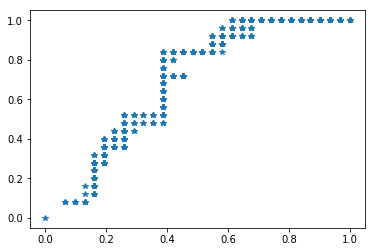

In [13]:
hidden_size = 64

roc_list = np.array([[0, 0]])

for k in range(20):
    nu = 0.05*k+0.05
    a = np.load('roc_npy/nu%.2f_hid%d.npy'%(nu, hidden_size))
    roc_list = np.vstack((roc_list, a))
#     max_idx = np.argmax(np.sqrt(np.sum((a-np.array([1,0]))**2, axis=1)))
#     roc_list = np.vstack((roc_list, a[max_idx]))
    
for k in range(9):
    nu = 0.005*k+0.955
    a = np.load('roc_npy/nu%.3f_hid%d.npy'%(nu, hidden_size))
    roc_list = np.vstack((roc_list, a))
#     max_idx = np.argmax(np.sqrt(np.sum((a-np.array([1,0]))**2, axis=1)))
#     roc_list = np.vstack((roc_list, a[max_idx]))

    
print(np.shape(roc_list), roc_list)
plt.plot(roc_list[:,0],roc_list[:,1], '*')
plt.show()

[[0.         0.        ]
 [0.         0.        ]
 [0.06451613 0.08      ]
 [0.09677419 0.08      ]
 [0.12903226 0.16      ]
 [0.16129032 0.32      ]
 [0.19354839 0.4       ]
 [0.22580645 0.44      ]
 [0.25806452 0.52      ]
 [0.29032258 0.52      ]
 [0.32258065 0.52      ]
 [0.35483871 0.52      ]
 [0.38709677 0.84      ]
 [0.41935484 0.84      ]
 [0.4516129  0.84      ]
 [0.48387097 0.84      ]
 [0.51612903 0.84      ]
 [0.5483871  0.92      ]
 [0.58064516 0.96      ]
 [0.61290323 1.        ]
 [0.64516129 1.        ]
 [0.67741935 1.        ]
 [0.70967742 1.        ]
 [0.74193548 1.        ]
 [0.77419355 1.        ]
 [0.80645161 1.        ]
 [0.83870968 1.        ]
 [0.87096774 1.        ]
 [0.90322581 1.        ]
 [0.93548387 1.        ]
 [0.96774194 1.        ]
 [1.         1.        ]]


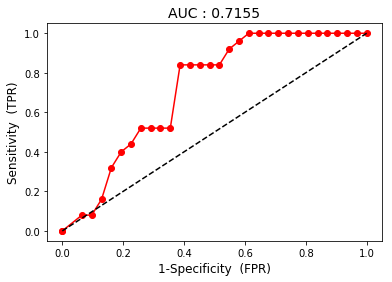

In [16]:
def cal_AUC(sensitivity, specificity):
    wid = (1-specificity)[:-1]-(1-specificity)[1:]
    auc = np.sum(sensitivity[1:]*wid)
    return auc

sort_x = np.unique(roc_list[:,0])
sorted_roc = np.array([[0,0]])

for k in sort_x:
    check_list = []
    for k2 in roc_list:
        if k2[0]==k:
            check_list.append(k2[1])
    sorted_roc = np.vstack((sorted_roc, np.array([[k,np.max(check_list)]])))
print(sorted_roc)

auc_result = auc(sorted_roc[:,0], sorted_roc[:,1])

plt.plot(sorted_roc[:,0], sorted_roc[:,1], 'ro-')
plt.xlabel('1-Specificity  (FPR)', fontsize=12)
plt.ylabel('Sensitivity  (TPR)', fontsize=12)
plt.plot([0,1],[0,1],'k--')
plt.title('AUC : %.4f'%auc_result, fontsize=14)
# plt.savefig('ROC_plot.png')
plt.show()